# TCRpeg embeddings

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Add autoreload for easier development
%load_ext autoreload
%autoreload 2

In [3]:
from tcrpeg_toolkit.embedding_clustering import EmbeddingClustering
from tcrpeg_toolkit.umap_generator import UMAPGenerator
from tcrpeg_toolkit.embedding_handler import EmbeddingHandler

In [4]:
sample_1 = EmbeddingClustering("results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy")

INFO - Data loaded from results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy


In [5]:
sample_1_clusters = sample_1.run(optimal_cluster=True)

INFO - Finding the optimal number of clusters using the elbow method...
INFO - Based on the rule of thumb, the maximum number of clusters k should be ≤ 15.
WARNING clustering 453 points to 12 centroids: please provide at least 468 training points
WARNING clustering 453 points to 13 centroids: please provide at least 507 training points
WARNING clustering 453 points to 14 centroids: please provide at least 546 training points
WARNING clustering 453 points to 15 centroids: please provide at least 585 training points
INFO - The optimal number of clusters k based on the elbow method is 1.
INFO - Silhouette score: 0.08609095215797424


Sampling a subset of 256 / 453 for training
Clustering 256 points in 640D to 1 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.00 s
  Iteration 9 (0.00 s, search 0.00 s): objective=762.984 imbalance=1.000 nsplit=0       
Applying hdbscan...


In [6]:
sample_1_clusters_umap = UMAPGenerator(sample_1_clusters)

Loaded Embedding Object


In [7]:
sample_1_clusters_umap.run()

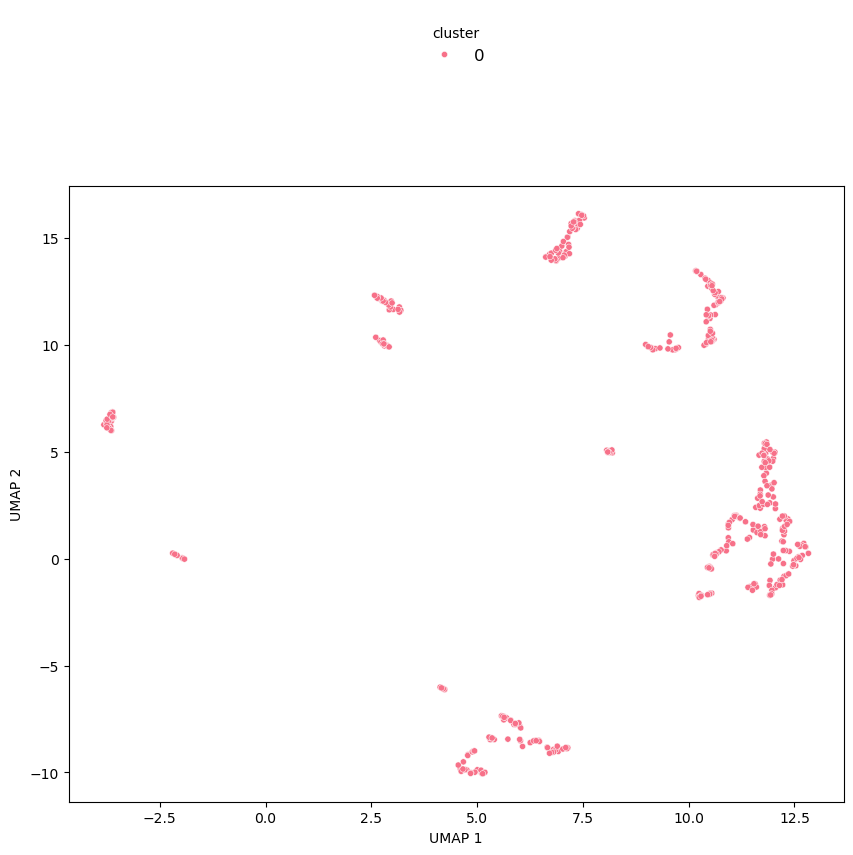

In [139]:
sample_1_clusters_umap.plot_umap(hue='cluster')

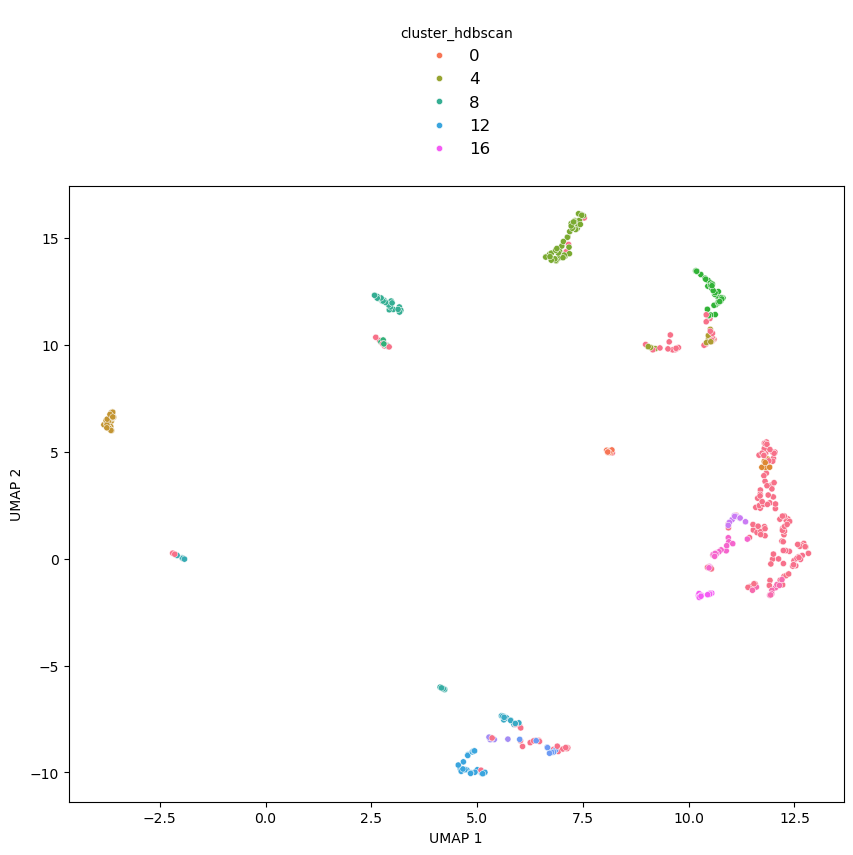

In [11]:
sample_1_clusters_umap.plot_umap(hue='cluster_hdbscan')

## Two samples

In [12]:
sample_1_metadata = pd.read_csv('sample_data/sample_1.csv')
sample_1_metadata['id'] = sample_1_metadata.index

In [13]:
sample_2_metadata = pd.read_csv('sample_data/sample_2.csv')
sample_2_metadata['id'] = sample_2_metadata.index

In [14]:
sample_1_embeddings = EmbeddingHandler("results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy", 
                                       name='sample_1', metadata=sample_1_metadata)
sample_2_embeddings = EmbeddingHandler("results_sample_data/embeddings/structured/sample_2_structured_embeddings.npy", 
                                       name='sample_2', metadata=sample_2_metadata)

INFO - Data loaded from results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy
INFO - Data loaded from results_sample_data/embeddings/structured/sample_2_structured_embeddings.npy


In [15]:
sample_1_embeddings

EmbeddingHandler(embeddings_shape=(453, 640), ids_shape=(453,), sequences_shape=(453,), metadata_shape=(453, 3), name=sample_1)

In [16]:
sample_2_embeddings

EmbeddingHandler(embeddings_shape=(1126, 640), ids_shape=(1126,), sequences_shape=(1126,), metadata_shape=(1126, 3), name=sample_2)

In [17]:
samples_all_embeddings = sample_1_embeddings + sample_2_embeddings

In [18]:
samples_all_embeddings

EmbeddingHandler(embeddings_shape=(1579, 640), ids_shape=(1579,), sequences_shape=(1579,), metadata_shape=(1579, 5), name=sample_1_sample_2)

In [52]:
samples_all_clusters = EmbeddingClustering(samples_all_embeddings).run()

INFO - Loaded Embedding Object
INFO - Applying hdbscan...


Sampling a subset of 1024 / 1579 for training
Clustering 1024 points in 640D to 4 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.00 s
  Iteration 9 (0.00 s, search 0.00 s): objective=3621.76 imbalance=1.169 nsplit=0       


INFO - Silhouette score: 0.0896281823515892
INFO - Davies-Bouldin score: 1.819791219970289
INFO - Calinski-Harabasz score: 522.8045106424339


In [53]:
samples_all_clusters_umap = UMAPGenerator(samples_all_clusters)

Loaded Embedding Object


In [54]:
samples_all_clusters_umap.run()

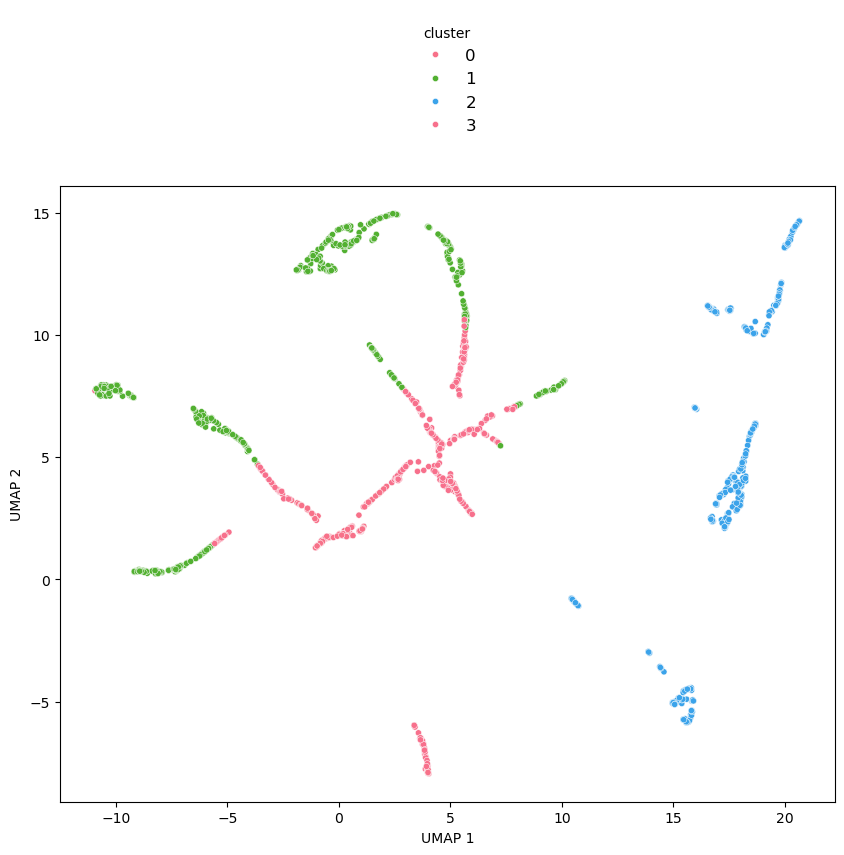

In [56]:
samples_all_clusters_umap.plot_umap(hue='cluster')

/Users/celinebalaa/Desktop/thesis/tools/TCRpeg_i3/tcrpeg_toolkit/umap_generator.py:177: UserWarning:


The palette list has fewer values (20) than needed (37) and will cycle, which may produce an uninterpretable plot.



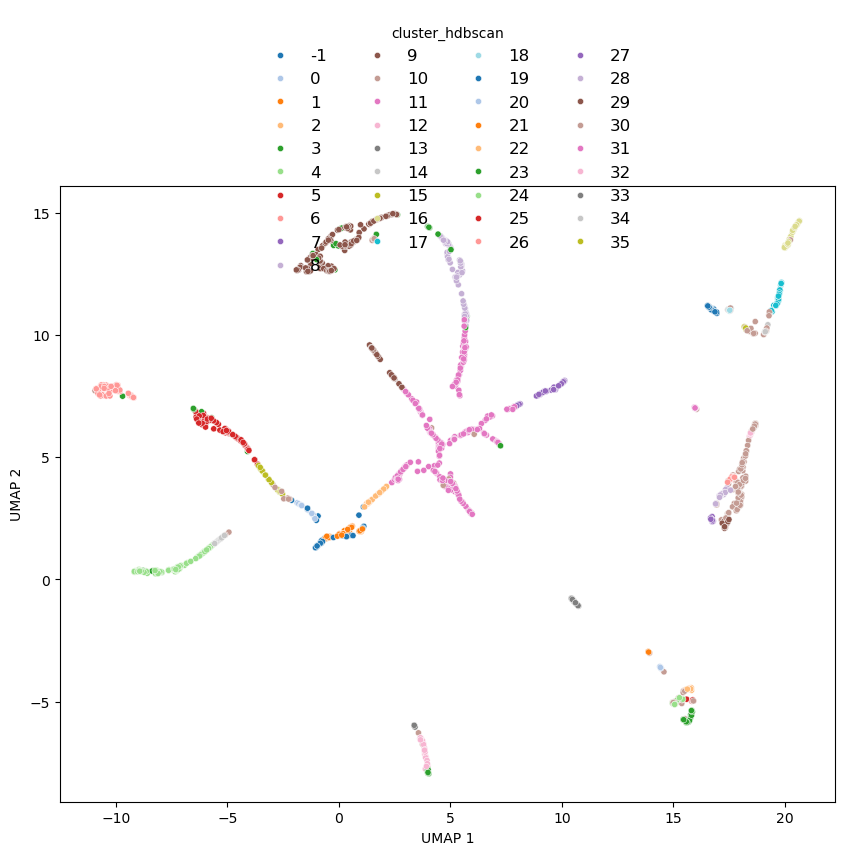

In [96]:
samples_all_clusters_umap.plot_umap(hue='cluster_hdbscan', palette='tab20')

In [126]:
samples_all_clusters_umap.plot_interactive_umap(hue='cluster_hdbscan')

In [124]:
plot_interactive_umap_external(samples_all_clusters_umap, hue='data_origin', size=None, symbol=None, opacity=0.7, marker_size=5, show=True)

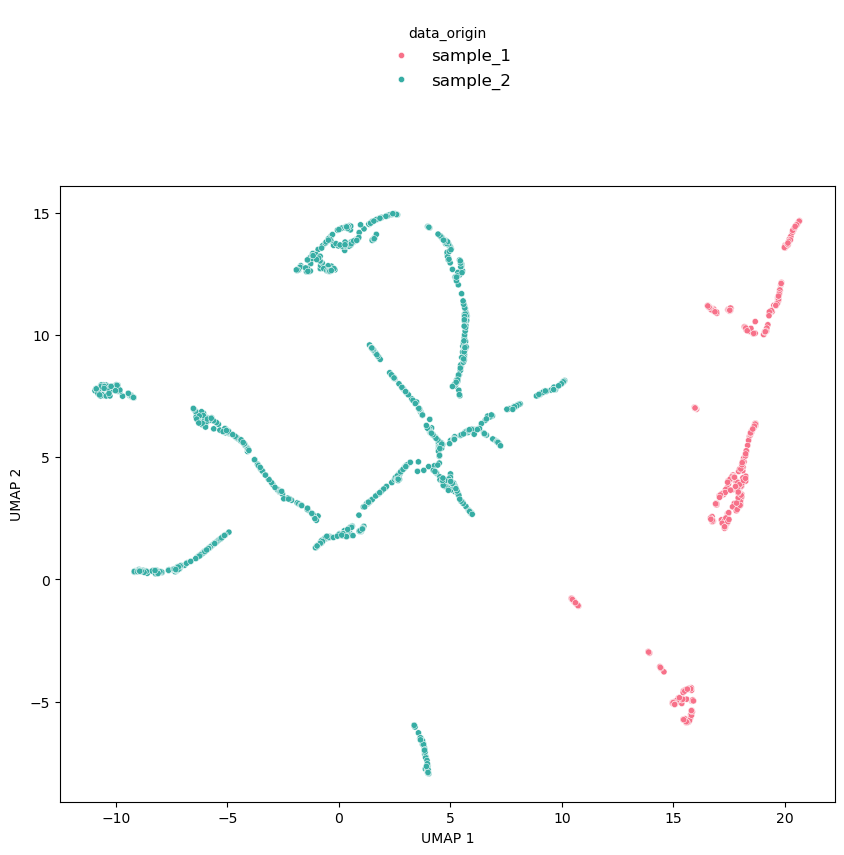

In [60]:
samples_all_clusters_umap.plot_umap(hue='data_origin')

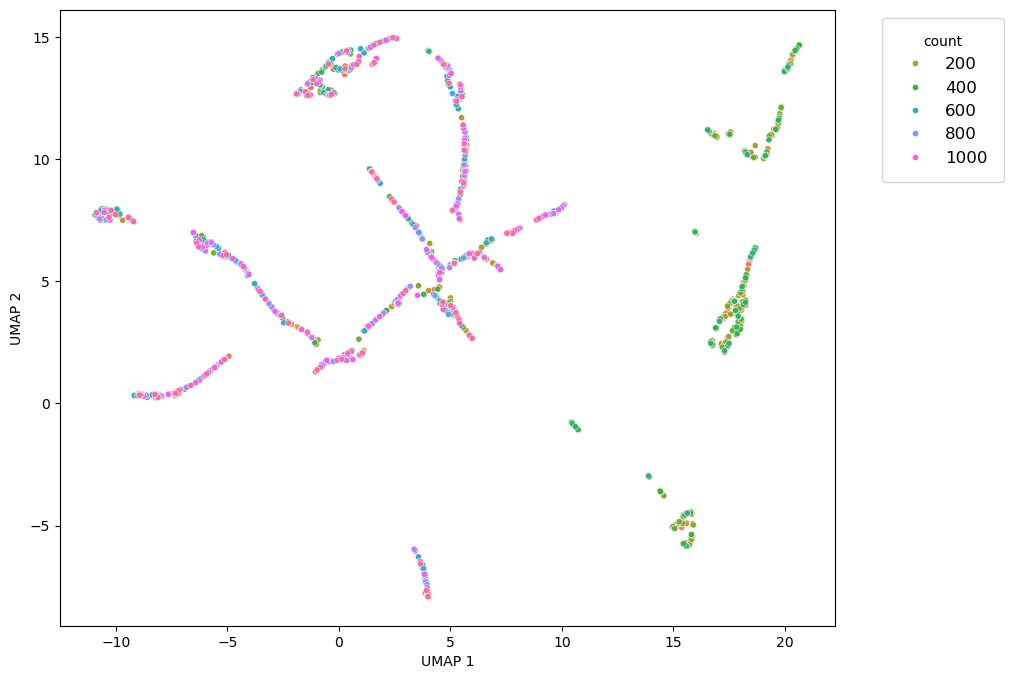

In [34]:
samples_all_clusters_umap.plot_umap(hue='count')

<Axes: xlabel='UMAP_1', ylabel='UMAP_2'>

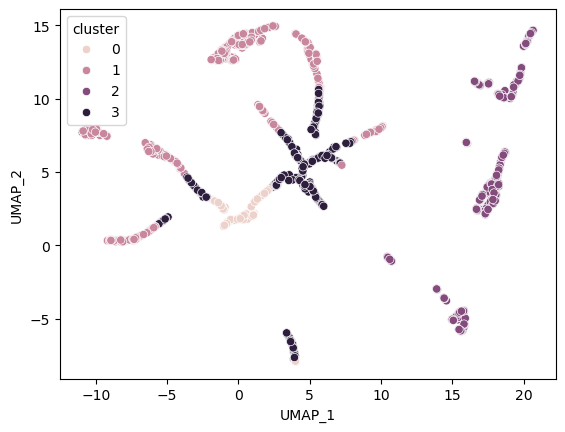

In [69]:
import seaborn as sns
sns.scatterplot(x='UMAP_1', y='UMAP_2', data=samples_all_clusters_umap.umap_data, hue='cluster')